In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import pandas as pd

In [ ]:
stock = fdr.StockListing('KRX')
stock['Market'].unique()
stock = stock[stock['Market'] != 'KONEX']
stock

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,65700,1,400,0.61,65800,65900,65400,10538622,691720671402,392214713535000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,572000,2,-8000,-1.38,577000,578000,563000,267430,152830791000,133848000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,89100,1,1400,1.60,87700,89800,87200,2624982,233579308586,64865010721500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,785000,3,0,0.00,785000,789000,781000,34511,27105749000,55871590000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,771000,2,-29000,-3.63,798000,798000,766000,280781,218314003000,54426696453000,70592343,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,001527,KR7001522002,동양2우B,KOSPI,,13100,2,-30,-0.23,13120,13150,13000,3548,46153010,4042253900,308569,STK
2702,001525,KR7001521004,동양우,KOSPI,,6410,2,-120,-1.84,6540,6540,6410,2189,14038410,3959655710,617731,STK
2703,002787,KR7002782001,진흥기업2우B,KOSPI,,13300,2,-10,-0.08,13400,13400,13200,27,359850,3920946400,294808,STK
2704,021045,KR7021041009,대호특수강우,KOSDAQ,중견기업부,9190,1,100,1.10,9080,9190,8900,389,3525580,3898820740,424246,KSQ


In [ ]:
df_preferred = pd.read_excel('/content/drive/MyDrive/df_preferred.xlsx')
df_preferred

,종목코드,종목명
0,005935,삼성전자우
1,005387,현대차2우B
2,051915,LG화학우
3,066575,LG전자우
4,051905,LG생활건강우
5,006405,삼성SDI우
6,000815,삼성화재우
7,00680K,미래에셋증권2우B
8,090435,아모레퍼시픽우
9,003545,대신증권우


In [ ]:
from statsmodels.tsa.stattools import coint
import time


In [ ]:
symbols = list(df_preferred['종목코드'])
all_data = pd.DataFrame()
start_date = '2020-01-01'
end_date = '2023-04-09'
i = 0
for symbol in symbols:
  i+=1
  data = fdr.DataReader(symbol = symbol, start= start_date)
  print(data)
  data['symbol'] = symbol
  all_data = pd.concat([all_data,data],axis =0)

#all_data = all_data[~all_data.index.duplicated(keep='last')]


             Open   High    Low  Close   Volume    Change
Date                                                     
2020-01-02  45750  45950  45150  45600  1512362  0.004405
2020-01-03  46150  46600  45350  45650  1892001  0.001096
2020-01-06  44950  45700  44700  45700  1212706  0.001095
2020-01-07  45800  46600  45750  46300  1655637  0.013129
2020-01-08  46400  47500  45900  46700  3625223  0.008639
...           ...    ...    ...    ...      ...       ...
2023-04-17  55100  55700  54700  55700  1200074  0.009058
2023-04-18  55700  55700  55100  55700  1085992  0.000000
2023-04-19  55700  55700  55100  55500  1714591 -0.003591
2023-04-20  55200  55500  54800  54800  1430871 -0.012613
2023-04-21  55100  55700  54900  55700  1496292  0.016423

[819 rows x 6 columns]
             Open    High    Low   Close  Volume    Change
Date                                                      
2020-01-02  80000   81000  78800   78800   40450 -0.007557
2020-01-03  79700   80300  77600   78600   59

In [ ]:
all_data_df = all_data

In [ ]:
all_data

,Open,High,Low,Close,Volume,Change,symbol
Date,,,,,,,
2020-01-02,45750,45950,45150,45600,1512362,0.004405,005935
2020-01-03,46150,46600,45350,45650,1892001,0.001096,005935
2020-01-06,44950,45700,44700,45700,1212706,0.001095,005935
2020-01-07,45800,46600,45750,46300,1655637,0.013129,005935
2020-01-08,46400,47500,45900,46700,3625223,0.008639,005935
...,...,...,...,...,...,...,...
2023-04-17,109600,110300,107900,108500,253946,-0.013636,028260
2023-04-18,108100,108900,107500,107600,247520,-0.008295,028260
2023-04-19,107700,109200,107700,108300,211125,0.006506,028260


In [ ]:
all_data = all_data.pivot_table(index='Date', columns = 'symbol', values= 'Close')
all_data.index.name = None
all_data.columns.name = None
all_data

,000150,000155,000810,000815,000880,00088K,003540,003545,003550,003555,...,051910,051915,066570,066575,071050,071055,090430,090435,097950,097955
2020-01-02,68900,60500,238500,162500,24350,13550,11950,8860,67166,35840,...,314000,171000,71000,28400,70900,43400,207500,91900,245000,107500
2020-01-03,68300,60200,237000,162500,24550,13550,11950,8840,67638,35876,...,311000,172000,71100,28300,71600,43200,206500,92200,241000,106000
2020-01-06,66600,60100,234000,161000,23500,13450,11650,8730,67543,35913,...,307000,168500,69900,27900,69500,42350,207000,92200,233500,103500
2020-01-07,66300,60100,237000,161500,23650,13350,11600,8770,68488,36023,...,311000,169500,70300,27850,70200,42500,222500,97400,234000,104500
2020-01-08,64800,59400,232500,160000,22500,13150,11300,8670,67355,35656,...,302000,165500,67500,27100,69100,41600,214000,93700,229500,102500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,101300,53700,206500,161500,26400,14090,13250,12830,88400,66600,...,805000,411000,112200,48900,56800,42450,133300,43500,319000,146400
2023-04-18,98900,53000,211000,162900,26250,14070,13330,12810,91000,68500,...,825000,442000,111600,49300,56900,42250,140200,44700,320000,146900
2023-04-19,98800,52800,212500,162700,30150,14990,13370,12850,91700,68600,...,790000,430000,112900,49950,57300,42300,141900,45000,318000,147600
2023-04-20,98100,52900,218000,163400,29500,14730,13340,12830,90300,68000,...,800000,413000,110600,49900,57700,41850,137200,43850,319500,148000


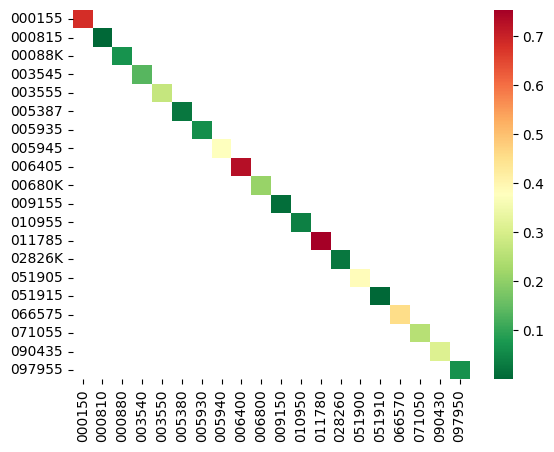

pairs_05: [('000810', '000815'), ('005380', '005387'), ('009150', '009155'), ('010950', '010955'), ('028260', '02826K'), ('051910', '051915')]
pairs_02: [('000810', '000815'), ('009150', '009155'), ('051910', '051915')]


In [ ]:
def find_cointegrated_pairs(data):
    n = int((data.shape[1])/2)
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs_05 = []
    pairs_02 = []

    keys_i = []
    keys_j = []
    k = 0
    for i in range(0, 40, 2):
        j = i+1
        S1 = data[keys[i]]
        keys_i.append(keys[i])

        S2 = data[keys[j]]
        keys_j.append(keys[j])

        result = coint(S1, S2)
        score = result[0]
        pvalue = result[1]
        score_matrix[k, k] = score
        pvalue_matrix[k, k] = pvalue
        k+=1
        if pvalue < 0.05:
          pairs_05.append((keys[i], keys[j]))
        if pvalue < 0.02:
          pairs_02.append((keys[i], keys[j]))
        i+=1
    return score_matrix, pvalue_matrix, pairs_05, pairs_02, keys_i, keys_j

import numpy as np
import matplotlib.pyplot as plt


scores, pvalues, pairs_05,pairs_02, keys_i, keys_j = find_cointegrated_pairs(all_data)

import seaborn
m = [0,0.2,0.4,0.6,0.8,1]
instrumentIds = list(all_data.columns.values)
seaborn.heatmap(pvalues, xticklabels=keys_i,
                yticklabels=keys_j, cmap='RdYlGn_r',
                mask = (pvalues >= 0.98))
plt.show()
print("pairs_05:", pairs_05)
print("pairs_02:",pairs_02)

Text(0.5, 1.0, "('000810', 'and', '000815')")

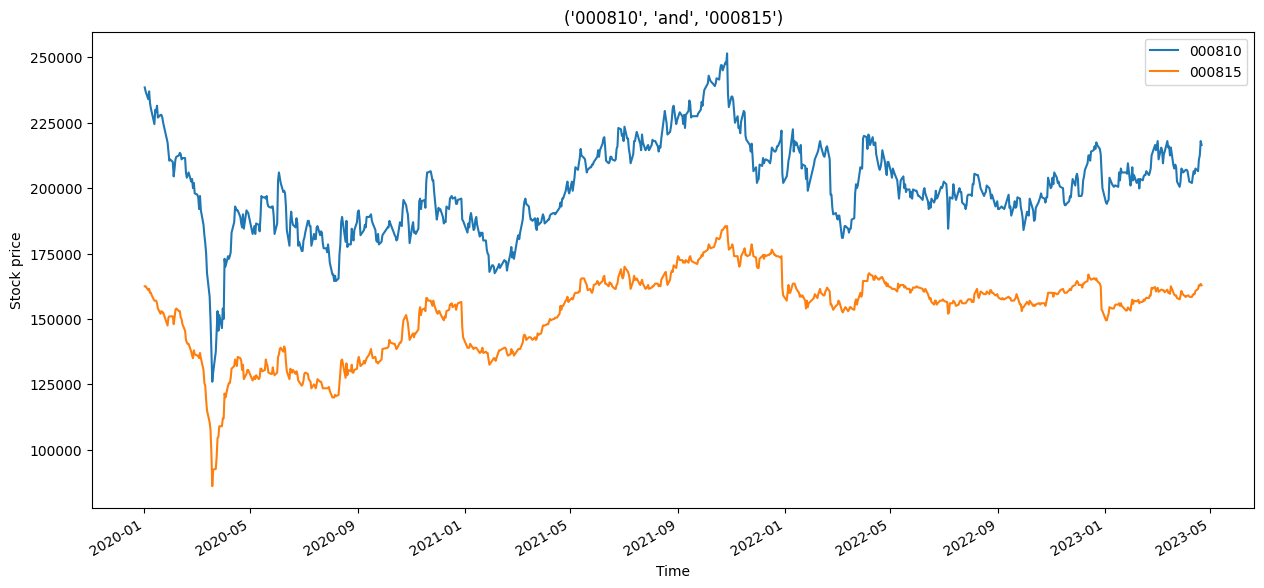

In [ ]:
X_name, Y_name = '000810', '000815'

all_data_ex = all_data[[X_name, Y_name]]
all_data_ex.plot(figsize=(15,7))
plt.ylabel('Stock price')
plt.xlabel('Time')
title =  X_name, 'and', Y_name
plt.title(title)

Text(0.5, 1.0, "('cum_rtn of', '000810', 'and', '000815')")

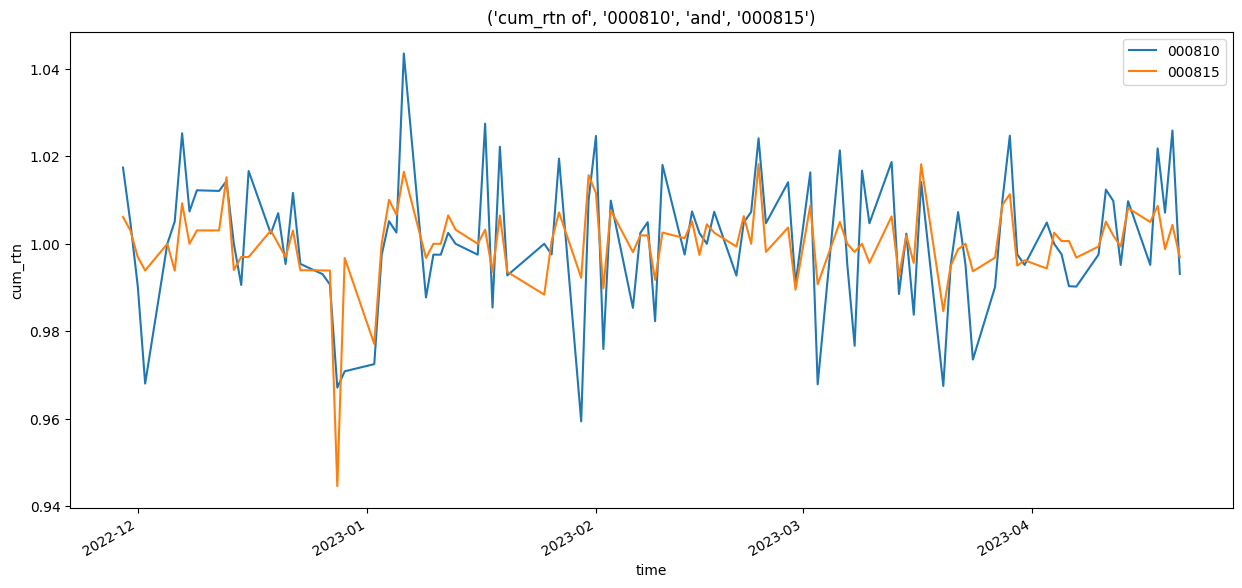

In [ ]:
cumm_rtn = (1+all_data_ex.pct_change())
cumm_rtn = cumm_rtn.tail(100)
cumm_rtn.plot(figsize=(15,7))

X = cumm_rtn[X_name]
Y = cumm_rtn[Y_name]

plt.ylabel('cum_rtn')
plt.xlabel('time')
title = 'cum_rtn of', X_name, 'and', Y_name
plt.title(title)




In [ ]:
score, pvalue, _ = coint(X,Y)
print('Correlation: ' + str(X.corr(Y)))
print('Cointegration test p-value: ' + str(pvalue))

Correlation: 0.7089992384704935
Cointegration test p-value: 7.131320981189037e-20


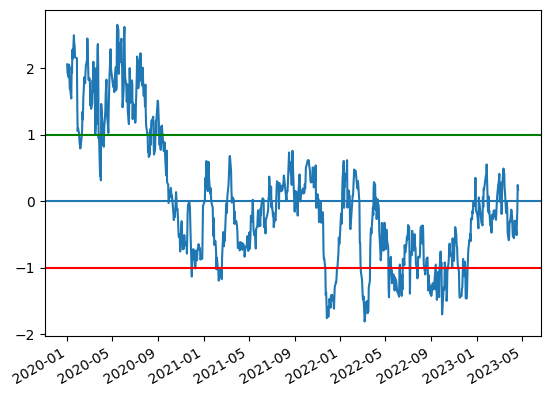

In [ ]:
def zscore(series):
  return (series - series.mean()) / np.std(series)

ratios = all_data_ex[X_name] / all_data_ex[Y_name]
zscore(ratios).plot()
plt.axhline(zscore(ratios).mean())
plt.axhline(1.0, color = 'green')
plt.axhline(-1.0, color = 'red')
plt.show()

Text(0.5, 1.0, "('009150', 'and', '009155')")

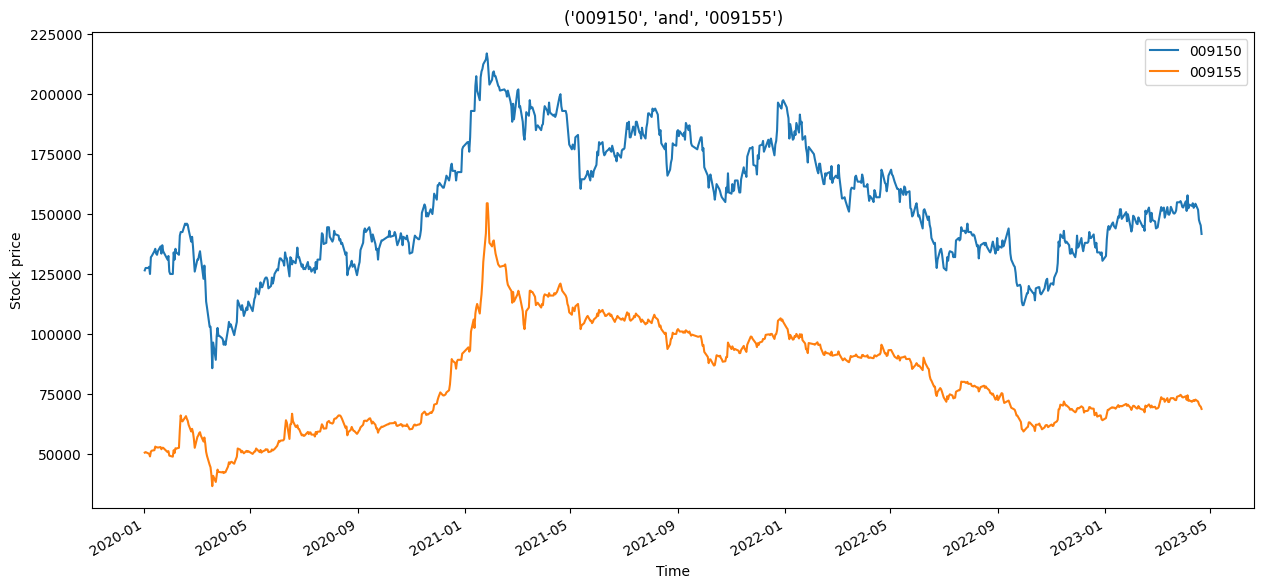

In [ ]:
X_name, Y_name = '009150', '009155'

all_data_ex = all_data[[X_name, Y_name]]
all_data_ex.plot(figsize=(15,7))
plt.ylabel('Stock price')
plt.xlabel('Time')
title =  X_name, 'and', Y_name
plt.title(title)

Text(0.5, 1.0, "('cum_rtn of', '009150', 'and', '009155')")

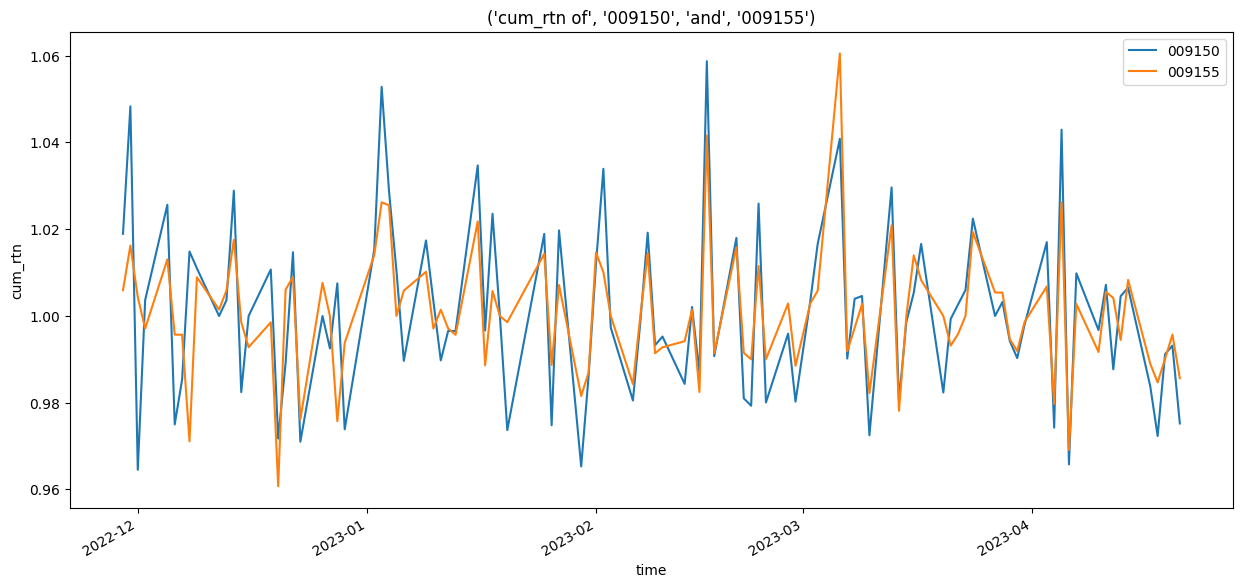

In [ ]:
cumm_rtn = (1+all_data_ex.pct_change())
cumm_rtn = cumm_rtn.tail(100)
cumm_rtn.plot(figsize=(15,7))

X = cumm_rtn[X_name]
Y = cumm_rtn[Y_name]

plt.ylabel('cum_rtn')
plt.xlabel('time')
title = 'cum_rtn of', X_name, 'and', Y_name
plt.title(title)




In [ ]:
score, pvalue, _ = coint(X,Y)
print('Correlation: ' + str(X.corr(Y)))
print('Cointegration test p-value: ' + str(pvalue))

Correlation: 0.7859699719234682
Cointegration test p-value: 2.2924736174476966e-23


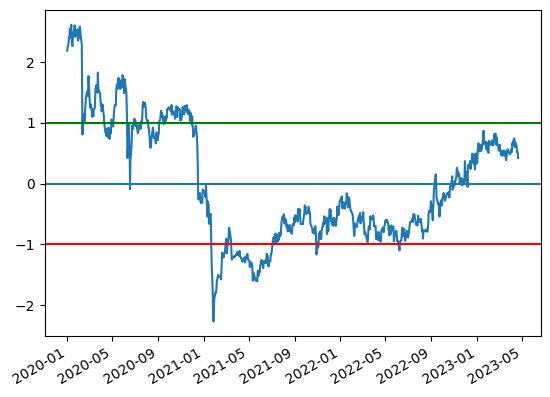

In [ ]:
def zscore(series):
  return (series - series.mean()) / np.std(series)

ratios = all_data_ex[X_name] / all_data_ex[Y_name]
zscore(ratios).plot()
plt.axhline(zscore(ratios).mean())
plt.axhline(1.0, color = 'green')
plt.axhline(-1.0, color = 'red')
plt.show()

Text(0.5, 1.0, "('051910', 'and', '051915')")

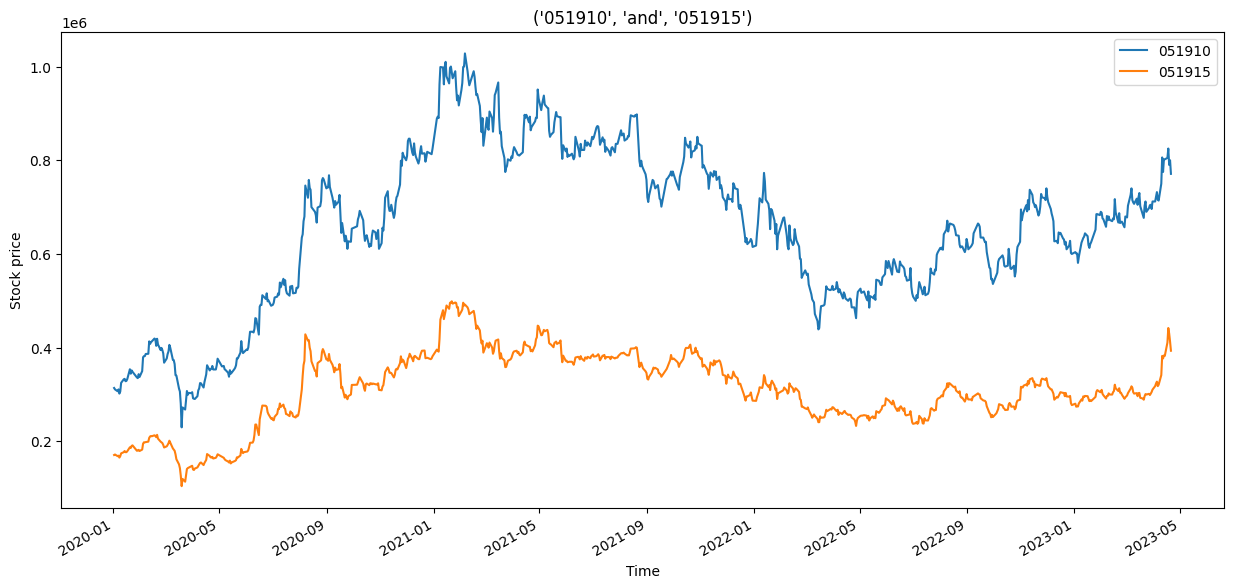

In [ ]:
X_name, Y_name = '051910','051915'

all_data_ex = all_data[[X_name, Y_name]]
all_data_ex.plot(figsize=(15,7))
plt.ylabel('Stock price')
plt.xlabel('Time')
title =  X_name, 'and', Y_name
plt.title(title)

Text(0.5, 1.0, "('cum_rtn of', '051910', 'and', '051915')")

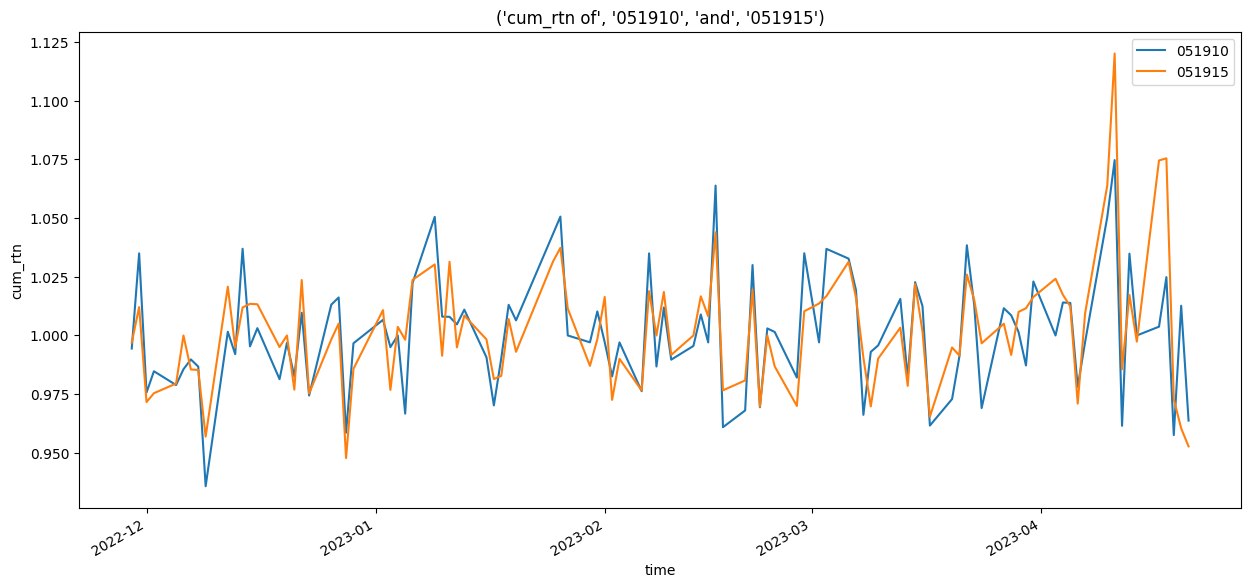

In [ ]:
cumm_rtn = (1+all_data_ex.pct_change())
cumm_rtn = cumm_rtn.tail(100)
cumm_rtn.plot(figsize=(15,7))

X = cumm_rtn[X_name]
Y = cumm_rtn[Y_name]

plt.ylabel('cum_rtn')
plt.xlabel('time')
title = 'cum_rtn of', X_name, 'and', Y_name
plt.title(title)




In [ ]:
score, pvalue, _ = coint(X,Y)
print('Correlation: ' + str(X.corr(Y)))
print('Cointegration test p-value: ' + str(pvalue))

Correlation: 0.7707498887339598
Cointegration test p-value: 1.0618150453032293e-12


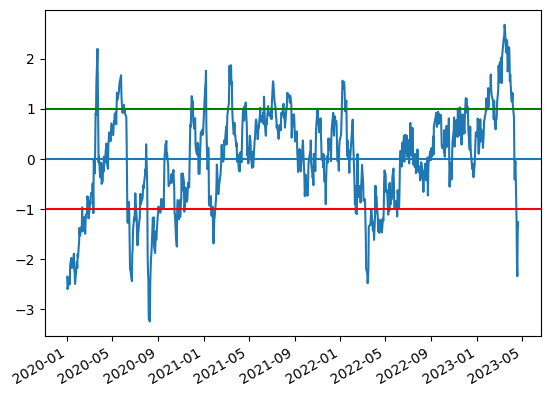

In [ ]:
def zscore(series):
  return (series - series.mean()) / np.std(series)

ratios = all_data_ex[X_name] / all_data_ex[Y_name]
zscore(ratios).plot()
plt.axhline(zscore(ratios).mean())
plt.axhline(1.0, color = 'green')
plt.axhline(-1.0, color = 'red')
plt.show()

In [ ]:
zscore(ratios)

2020-01-02   -2.346448
2020-01-03   -2.594784
2020-01-06   -2.472735
2020-01-07   -2.359246
2020-01-08   -2.447873
                ...   
2023-04-17   -1.265586
2023-04-18   -2.079204
2023-04-19   -2.338040
2023-04-20   -1.456282
2023-04-21   -1.259388
Length: 819, dtype: float64

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

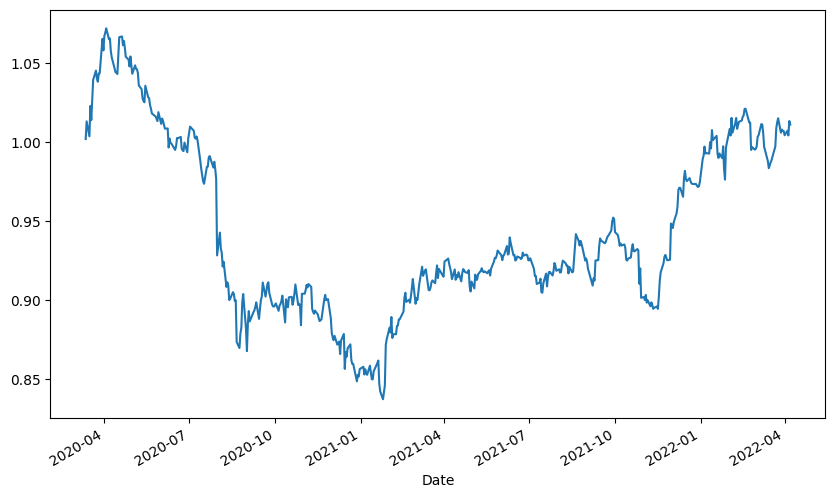

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

stock1 = "AAPL"
stock2 = "MSFT"

data1 = yf.download(stock1, start="2020-01-01", end="2022-04-08")
data2 = yf.download(stock2, start="2020-01-01", end="2022-04-08")

#공적분 검증 필요


spread = data1["Close"] - data2["Close"]

spread_mean = spread.mean()
spread_std = spread.std()


spread_threshold = 1.5 * spread_std
signals = pd.DataFrame(index=spread.index)
signals["signal"] = np.where(spread > spread_mean + spread_threshold, -1, np.nan)
signals["signal"] = np.where(spread < spread_mean - spread_threshold, 1, signals["signal"])
signals["signal"] = signals["signal"].ffill()

positions = pd.DataFrame(index=spread.index)
positions[stock1] = signals["signal"] / 2
positions[stock2] = -signals["signal"] / 2

returns = (data1["Close"].pct_change() * positions[stock1]) + (data2["Close"].pct_change() * positions[stock2])

cumulative_returns = (1 + returns).cumprod()

cumulative_returns.plot(figsize=(10, 6))